# importing the neccessary library and the dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names=['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']
df=pd.read_csv('cardiovascular_diseases.csv',names=names)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.0,62.0,110,80.0,1.0,1.0,0.0,0.0,1,0
1,1,20228,1,156.0,85.0,140,90.0,3.0,1.0,0.0,0.0,1,1
2,2,18857,1,165.0,64.0,130,70.0,3.0,1.0,0.0,0.0,0,1
3,3,17623,2,169.0,82.0,150,100.0,1.0,1.0,0.0,0.0,1,1
4,4,17474,1,156.0,56.0,100,60.0,NaN,1.0,0.0,0.0,0,0


# Looking the size of rows,columns and Data types

In [3]:
print("The size of the rows and the columns =", df.shape) #indicating number of rows and columns
print("Duplicated rows =", df.duplicated().sum()) #to show a duplicated rows if any
print(df.info()) #indicate information about the data types

The size of the rows and the columns = (70000, 13)
Duplicated rows = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       69999 non-null  float64
 4   weight       69983 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        69979 non-null  float64
 7   cholesterol  69972 non-null  float64
 8   gluc         69982 non-null  float64
 9   smoke        69968 non-null  float64
 10  alco         69978 non-null  float64
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 6.9 MB
None


# Exploratory data analysis

In [4]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,69999.000000,69983.000000,70000.000000,69979.000000,69972.000000,69982.000000,69968.000000,69978.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359219,74.205311,128.817286,96.634690,1.366875,1.226487,0.088155,0.053774,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210185,14.395694,154.011419,188.500564,0.680277,0.572294,0.283522,0.225573,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# checking whether the target class are balanced or not

In [6]:
df["cardio"].value_counts()# balanced class

0    35021
1    34979
Name: cardio, dtype: int64

# Maping the categorical features

In [7]:
df['age'] =  df['age'] / 365
df['cholesterol'] = df['cholesterol'].map({ 1: 'normal', 2: 'aboveNormal', 3: 'wellAboveNormal'})
df['gluc']=df['gluc'].map({ 1: 'normal', 2: 'aboveNormal', 3: 'wellAboveNormal'})
df['gender']=df['gender'].map({1: 'female', 2: 'male'})
df['cardio']=df['cardio'].map({0: 'no', 1: 'yes'})


dummies = pd.get_dummies(df[['cholesterol','gluc','gender']])
df = pd.concat([df,dummies],axis=1)
df.drop(['cholesterol','gluc','gender'],axis=1,inplace=True)
df.head()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_aboveNormal,cholesterol_normal,cholesterol_wellAboveNormal,gluc_aboveNormal,gluc_normal,gluc_wellAboveNormal,gender_female,gender_male
0,0,50.391781,168.0,62.0,110,80.0,0.0,0.0,1,no,0,1,0,0,1,0,0,1
1,1,55.419178,156.0,85.0,140,90.0,0.0,0.0,1,yes,0,0,1,0,1,0,1,0
2,2,51.663014,165.0,64.0,130,70.0,0.0,0.0,0,yes,0,0,1,0,1,0,1,0
3,3,48.282192,169.0,82.0,150,100.0,0.0,0.0,1,yes,0,1,0,0,1,0,0,1
4,4,47.873973,156.0,56.0,100,60.0,0.0,0.0,0,no,0,0,0,0,1,0,1,0


# Droping the feature that assumed no effect on our algorithms efficiency

In [8]:
df=df.drop('id', axis = 1)
df.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_aboveNormal,cholesterol_normal,cholesterol_wellAboveNormal,gluc_aboveNormal,gluc_normal,gluc_wellAboveNormal,gender_female,gender_male
0,50.391781,168.0,62.0,110,80.0,0.0,0.0,1,no,0,1,0,0,1,0,0,1
1,55.419178,156.0,85.0,140,90.0,0.0,0.0,1,yes,0,0,1,0,1,0,1,0
2,51.663014,165.0,64.0,130,70.0,0.0,0.0,0,yes,0,0,1,0,1,0,1,0
3,48.282192,169.0,82.0,150,100.0,0.0,0.0,1,yes,0,1,0,0,1,0,0,1
4,47.873973,156.0,56.0,100,60.0,0.0,0.0,0,no,0,0,0,0,1,0,1,0


# Visualization process: ploting box plot, Histogram, correlation

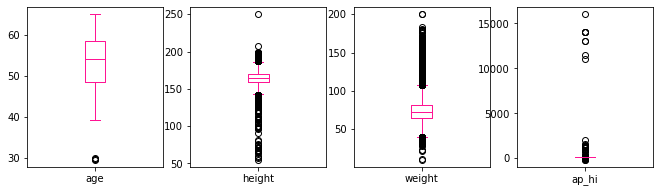

In [9]:
df[["age","height","weight","ap_hi"]].plot(kind='box', subplots=True, layout=(3,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

[Text(0.5, 1.0, 'The relation ship between age and cardio_disease')]

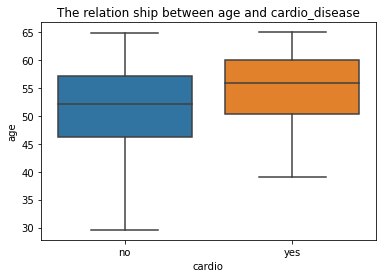

In [10]:
sns.boxplot(x="cardio", y="age", data=df).set(title='The relation ship between age and cardio_disease')



Text(0.5, 1.0, 'Age Distribution')

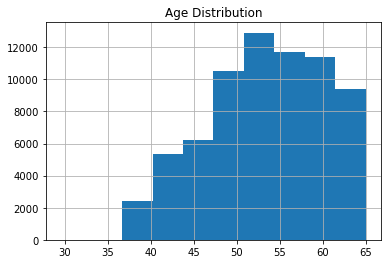

In [11]:
# ploting Histogram
df["age"].hist().plot(kind="bar")
plt.title("Age Distribution")


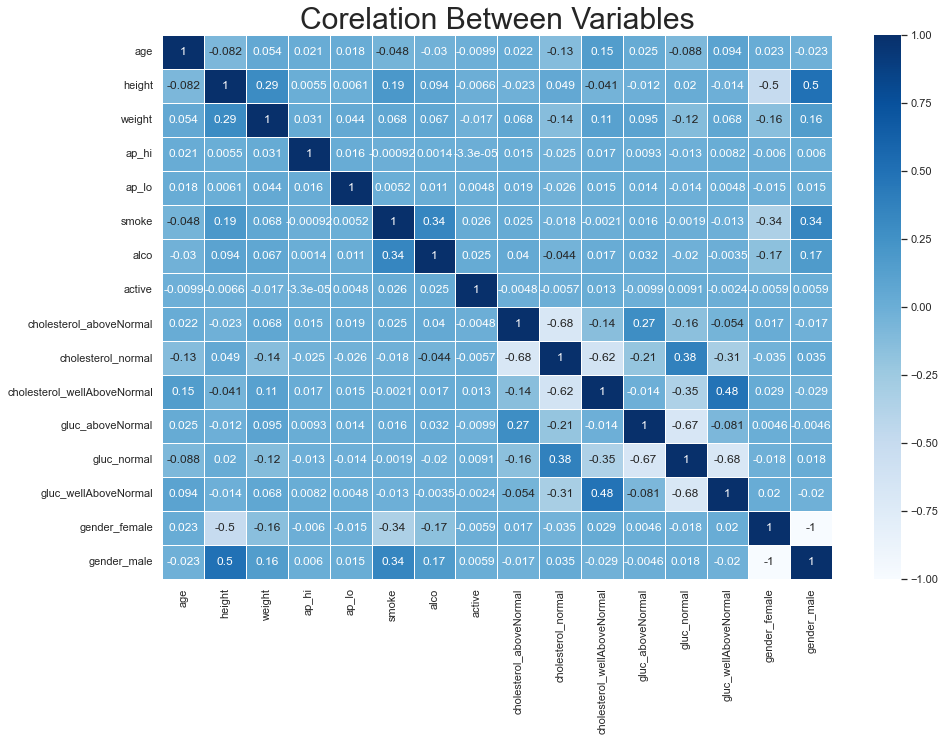

In [12]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

# treating the missing values if any

In [13]:
#checking the missing values if any
df.isnull().values.any() # we have a missing values on our data set

True

In [14]:
df.isnull().sum()#To cheack in which of the feature has a missing value
                # in our data set we have a missing value on features 'height','weight','ap_hi','ap_lo'
                #'cholesterol','gluc','smoke' and 'alco'

age                             0
height                          1
weight                         17
ap_hi                           0
ap_lo                          21
smoke                          32
alco                           22
active                          0
cardio                          0
cholesterol_aboveNormal         0
cholesterol_normal              0
cholesterol_wellAboveNormal     0
gluc_aboveNormal                0
gluc_normal                     0
gluc_wellAboveNormal            0
gender_female                   0
gender_male                     0
dtype: int64

In [15]:
#Fill the missing values using method ='ffill'
df.fillna(method ='ffill', inplace = True) #Forward-fill 
df.isnull().values.any()#

False

# Separating independent (feature) variables to x and dependent (target) variable to y

In [16]:
#Putting Feature Variable to X and Target variable to y.

# Putting feature variable to X
x = df.drop('cardio',axis=1)
# Putting response variable to y
y = df['cardio']

# spliting the data set into train and test set 

In [17]:

# import a library to split the data set
from sklearn.model_selection import train_test_split

# Splitting the data into train and test using train_test_split function
xtrain_data,xtest_data, ytrain_data, ytest_data = train_test_split(x, y, train_size=0.8, random_state=422,stratify=y)
xtrain_data.shape, xtest_data.shape

((56000, 16), (14000, 16))

# Building machine learning algorithms


# 1. Random Forest

In [18]:
#Let’s import RandomForestClassifier and fit the data.
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=422, max_depth=5,
                                       n_estimators=50)
# training the model
rf_classifier.fit(xtrain_data,  ytrain_data)


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=422)

# 1.1 predicting the xtest_data using the rf_classifier model

In [19]:
# Use the forest's predict method on the test data
predictions = rf_classifier.predict(xtest_data)# Calculate the absolute errors
predictions


array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

# 1.2 checking the accuracy, confussion matrix, classification score

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("THe accuracy is ", accuracy_score(ytest_data,predictions))
print("classification result")
print(classification_report(ytest_data, predictions))
print("confussin matrix result")
print(confusion_matrix(ytest_data, predictions))

THe accuracy is  0.7315
classification result
              precision    recall  f1-score   support

          no       0.70      0.80      0.75      7004
         yes       0.77      0.67      0.71      6996

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000

confussin matrix result
[[5580 1424]
 [2335 4661]]


# 1.3 Confusion Matrix Ploting

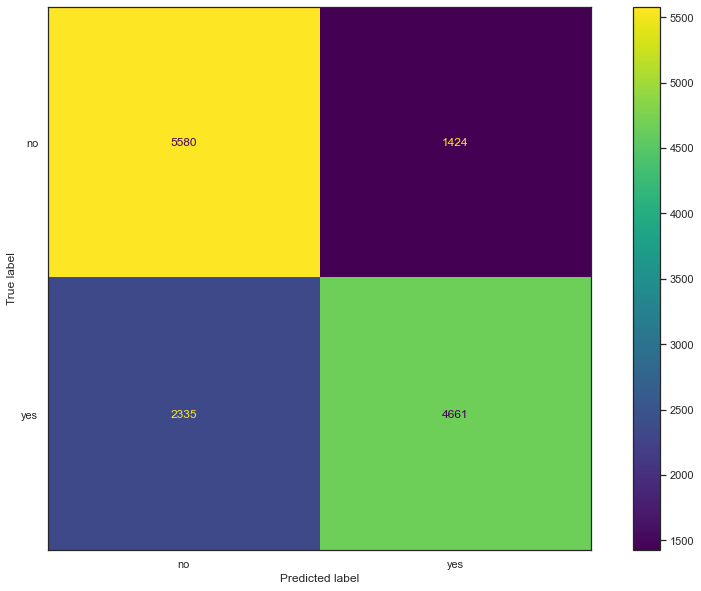

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier,xtest_data, ytest_data,display_labels=['no','yes'])
#save.fig('con')
plt.show()


In [22]:
%%time 
rf_classifier.fit(xtrain_data, ytrain_data)

Wall time: 2.3 s


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=422)

# 2. logistic regression 


In [23]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action="ignore")
LR_classifier = LogisticRegression()
# training the model
LR_classifier.fit(xtrain_data,  ytrain_data)

LogisticRegression()

# 2.1 Predicting test data using the LR_classifier

In [24]:
#predicting the test data using our model LR_classifier
#Predicting the output
LR_predict = LR_classifier.predict(xtest_data)
LR_predict 

array(['no', 'no', 'yes', ..., 'yes', 'no', 'no'], dtype=object)

# 2.2 Computing the accuracy

In [25]:
print("THe accuracy is ", accuracy_score(ytest_data,LR_predict))
print("classification result")
print(classification_report(ytest_data, LR_predict))
print("confussin matrix result")
print(confusion_matrix(ytest_data, LR_predict))

THe accuracy is  0.7130714285714286
classification result
              precision    recall  f1-score   support

          no       0.70      0.76      0.73      7004
         yes       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

confussin matrix result
[[5297 1707]
 [2310 4686]]


# 2.3 Ploting the confusion matrix

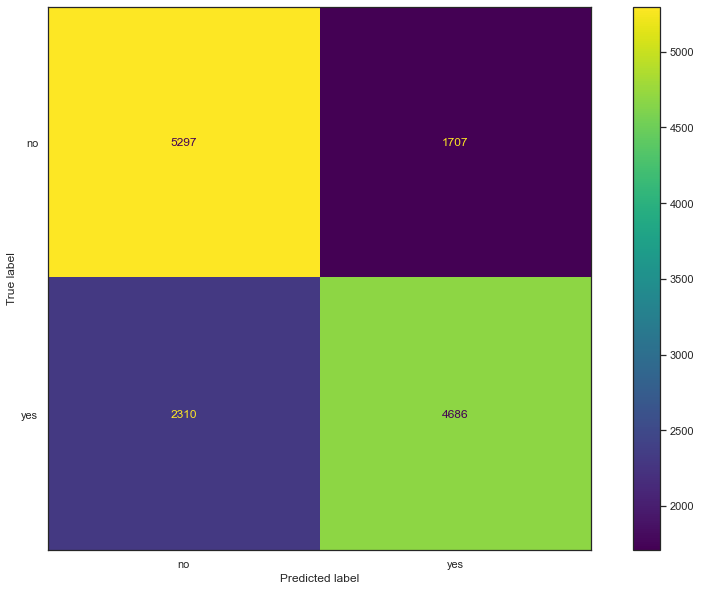

In [26]:
plot_confusion_matrix(LR_classifier,xtest_data, ytest_data,display_labels=['no','yes'])
#save.fig('con')
plt.show()

In [27]:
%%time 
LR_classifier.fit(xtrain_data, ytrain_data)

Wall time: 948 ms


LogisticRegression()

# 3. K-nearest neighbors 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
N_neigh = KNeighborsClassifier(n_neighbors=100)
N_neigh.fit(xtrain_data, ytrain_data)

KNeighborsClassifier(n_neighbors=100)

# 3.1 Predicting the test data



In [29]:
N_predicting= N_neigh.predict(xtest_data)
N_predicting

array(['no', 'no', 'yes', ..., 'yes', 'no', 'no'], dtype=object)

# 3.2 Computing the accuracy confusion_matrix and classification_report

In [30]:
print("THe accuracy is ", accuracy_score(ytest_data,N_predicting))
print("classification result")
print(classification_report(ytest_data, N_predicting))
print("confussin matrix result")
print(confusion_matrix(ytest_data, N_predicting))

THe accuracy is  0.7233571428571428
classification result
              precision    recall  f1-score   support

          no       0.70      0.78      0.74      7004
         yes       0.75      0.67      0.71      6996

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

confussin matrix result
[[5465 1539]
 [2334 4662]]


# 3.3 Ploting the confusion matrix

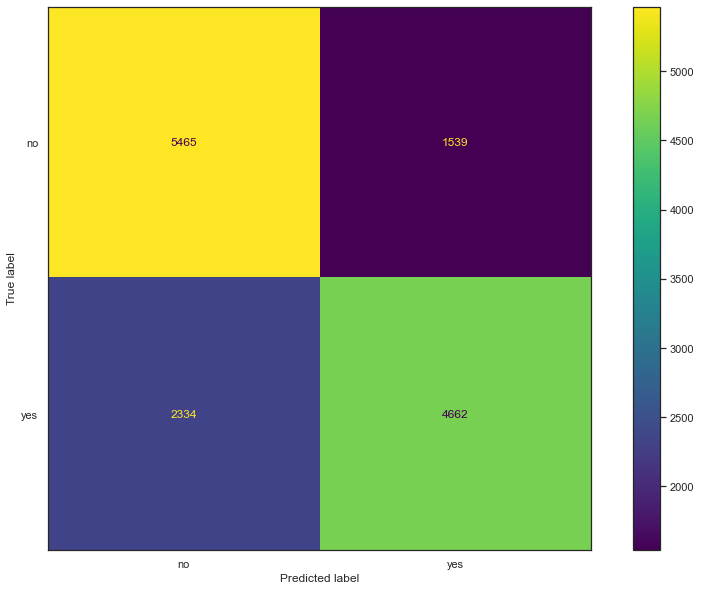

In [31]:
plot_confusion_matrix(N_neigh ,xtest_data, ytest_data,display_labels=['no','yes'])
#save.fig('con')
plt.show()

In [32]:
%%time 
N_neigh .fit(xtrain_data, ytrain_data)

Wall time: 141 ms


KNeighborsClassifier(n_neighbors=100)

# 4. Naive bayes classifiers

In [33]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(xtrain_data, ytrain_data)

GaussianNB()

# 4.1 Predicting The Test Data

In [34]:
classifier_nb_predicted = classifier_nb.predict(xtest_data)
classifier_nb_predicted

array(['no', 'no', 'yes', ..., 'yes', 'no', 'no'], dtype='<U3')

# 4.2 Computing the accuracy and classification_report

In [35]:
print("THe accuracy is ", accuracy_score(ytest_data,classifier_nb_predicted))
print("classification result")
print(classification_report(ytest_data, classifier_nb_predicted))
print("confussin matrix result")
print(confusion_matrix(ytest_data, classifier_nb_predicted))

THe accuracy is  0.5982857142857143
classification result
              precision    recall  f1-score   support

          no       0.57      0.83      0.67      7004
         yes       0.68      0.37      0.48      6996

    accuracy                           0.60     14000
   macro avg       0.63      0.60      0.58     14000
weighted avg       0.63      0.60      0.58     14000

confussin matrix result
[[5819 1185]
 [4439 2557]]


# 4.3 Ploting The Confusion-Matrix

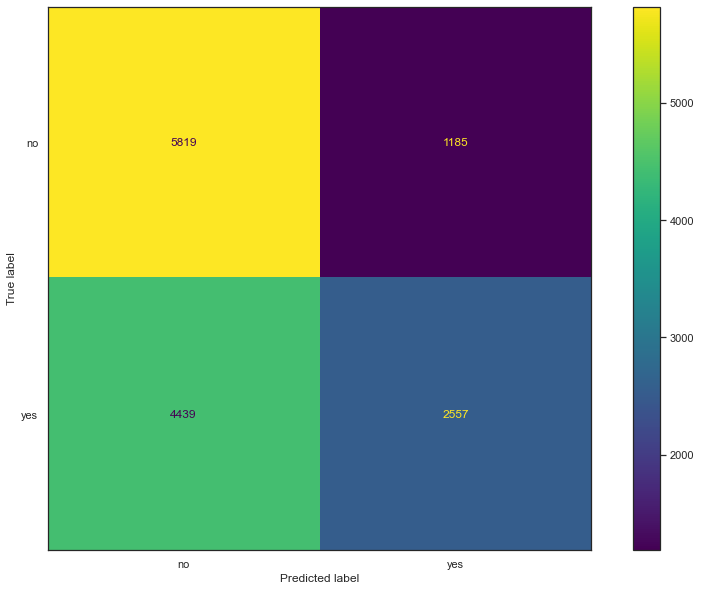

In [36]:
plot_confusion_matrix(classifier_nb ,xtest_data, ytest_data,display_labels=['no','yes'])
#save.fig('con')
plt.show()

In [37]:
%%time 
classifier_nb.fit(xtrain_data, ytrain_data)

Wall time: 142 ms


GaussianNB()

# 5. decission tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
Dt_model = DecisionTreeClassifier(max_depth=5)
Dt_model.fit(xtrain_data, ytrain_data)
Dt_predictions = Dt_model.predict(xtest_data)

# 5.1 Predict The Test Data

In [39]:
Dt_predictions = Dt_model.predict(xtest_data)
Dt_predictions

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

# 5.2 Accuracy And Classification Report

In [40]:
print("THe accuracy is ", accuracy_score(ytest_data,Dt_predictions))
print("classification result")
print(classification_report(ytest_data,Dt_predictions))
print("confussin matrix result")
print(confusion_matrix(ytest_data, Dt_predictions))

THe accuracy is  0.7327142857142858
classification result
              precision    recall  f1-score   support

          no       0.71      0.79      0.75      7004
         yes       0.76      0.67      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000

confussin matrix result
[[5547 1457]
 [2285 4711]]


# 5.3 Confusion Matrix Visualization

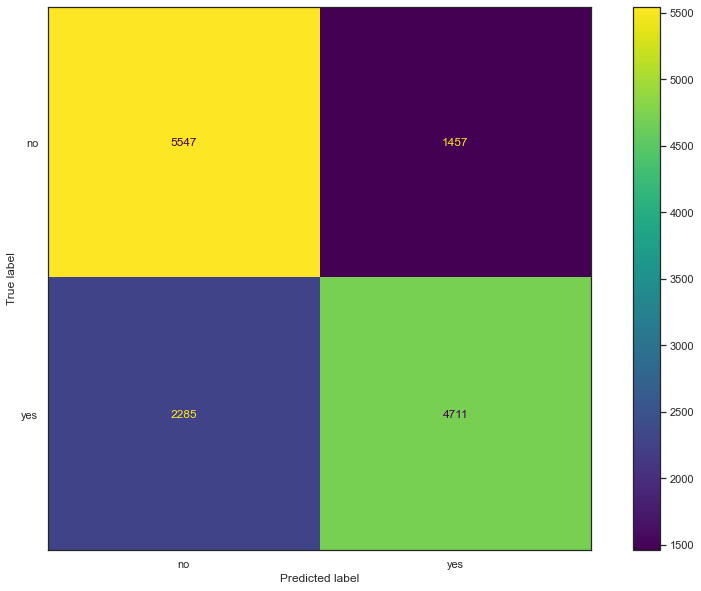

In [41]:
plot_confusion_matrix(Dt_model ,xtest_data, ytest_data,display_labels=['no','yes'])
#save.fig('con')
plt.show()

In [42]:
%%time 
Dt_model.fit(xtrain_data, ytrain_data)

Wall time: 280 ms


DecisionTreeClassifier(max_depth=5)

# summarized output of all algorithms accuracy

In [43]:
models = [('Random Forest Classification', accuracy_score(ytest_data,predictions)),
          ('Decision Tree Classification',  accuracy_score(ytest_data,Dt_predictions)),
          ('K Nearest Neighbor algorithm (KNN)', accuracy_score(ytest_data,N_predicting)),
          ('logistic regression', accuracy_score(ytest_data,LR_predict)),
          ('Naive bayes classifiers', accuracy_score(ytest_data,classifier_nb_predicted)),]

In [44]:
predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy Score of the algorithms'])
predict

,Model,Accuracy Score of the algorithms
0,Random Forest Classification,0.731500
1,Decision Tree Classification,0.732714
2,K Nearest Neighbor algorithm (KNN),0.723357
3,logistic regression,0.713071
4,Naive bayes classifiers,0.598286
